PROIEZIONE 3D -> 2D
[[495.07454014 399.20585975]
 [478.2053527  403.29038352]
 [477.42300056 513.51647347]
 [478.20429082 626.30649656]
 [511.9027326  395.64015716]
 [510.05828963 502.67042732]
 [513.72337481 612.59932443]
 [493.41501738 339.60467204]
 [493.61245404 273.83969212]
 [493.75231471 261.6130379 ]
 [495.24244457 235.45716889]
 [474.53496559 284.57177465]
 [457.81424176 288.70163689]
 [480.34944362 261.10969624]
 [512.58695498 288.07595218]
 [527.97702327 354.66098413]
 [518.9648387  403.03477459]]


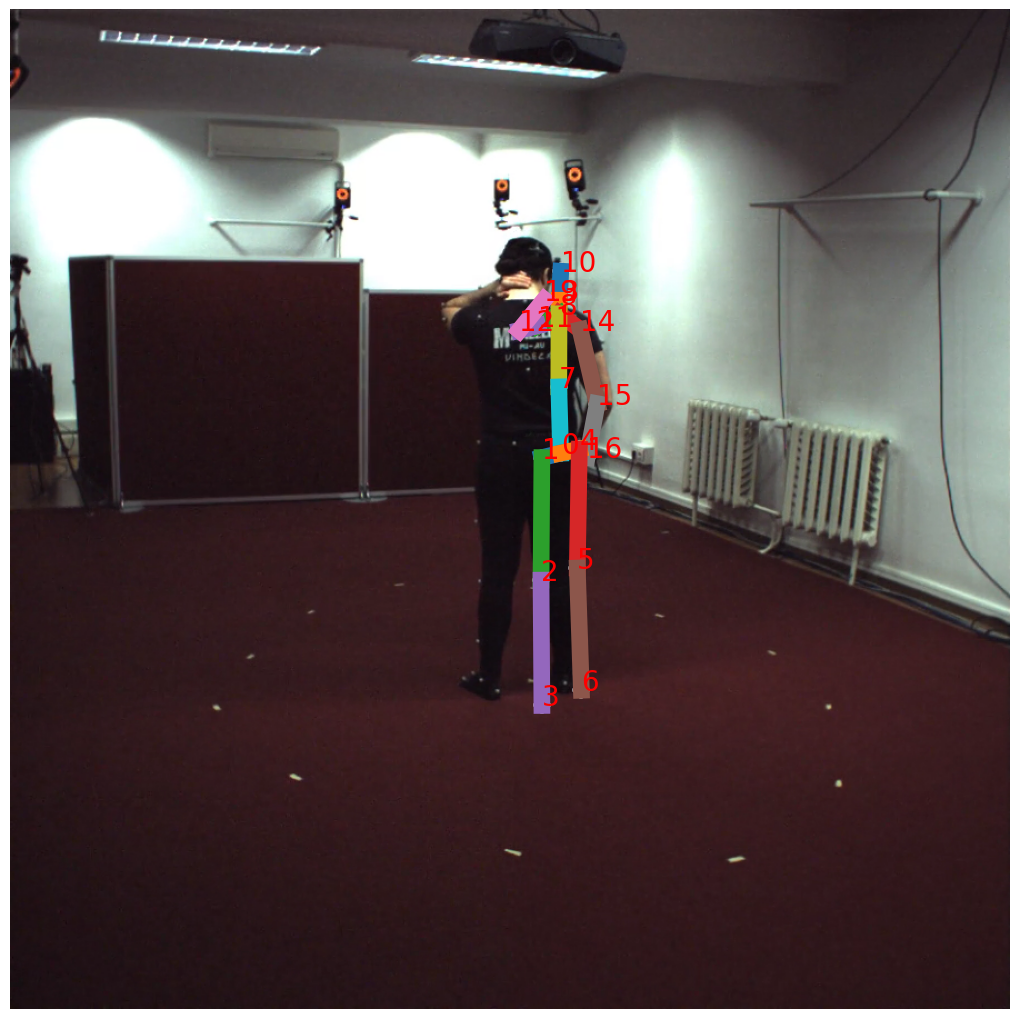

In [4]:
import sys
import numpy as np
import os
import re

sys.path.append('..')
from util.dataset_util import plot_over_image, read_data
ROOT_PATH = os.getcwd()
data_root = os.path.join(ROOT_PATH, '..', '..', 'dataset')

subset = 'test' # select from ['train']
subj_name = 's01_t' # subject names for 'train' subset
digit_subj = int(re.search(r'\d+', subj_name).group())
action_name = '093'# action names
camera_name = '50591643' # select from ['50591643', '58860488', '60457274', '65906101']
 # path to the parent directory (contains test/ meta/)
dataset_name = 'humansc3d'
idx_frame = 100 
n_test = 6
data_pred_path = os.path.join(ROOT_PATH, '..', '..', 'experiment', 'test'+str(n_test), 'result.pkl')
if not os.path.exists(data_pred_path):
            raise FileNotFoundError(f"File result.pkl not found at: {data_pred_path}")


frames, j3ds, cam_params, _, _, annotations = read_data(data_root, 
                                                                            dataset_name, 
                                                                             subset, 
                                                                             subj_name, 
                                                                             action_name, 
                                                                             camera_name)

R = cam_params['extrinsics']['R']
T = cam_params['extrinsics']['T']

import os
import pickle

DATAITEM_GT_PATH = os.path.join(data_root, dataset_name+"_test.pkl")
dataitem_gt = []
with open(DATAITEM_GT_PATH, 'rb') as f:
    dataitem_gt = pickle.load(f)

DBG = 1 

if DBG:
    with open(data_pred_path, 'rb') as f:
        dir_preds = pickle.load(f)
    preds = [item for item in dir_preds if int(item['videoid']) == int(action_name) and str(item['cameraid']) == camera_name and item['subject'] == digit_subj]
    pred = preds[idx_frame]['result'] 
    
else:
    with open(data_pred_path, 'rb') as f:
        preds = pickle.load(f)['result']  # [N, 17, 3]

    preds = np.reshape(preds, (-1, 17, 3))
    pred = preds[idx_frame]  # [17, 3]

frame = frames[idx_frame]
j2d_camera = pred[:, :2]
print("PROIEZIONE 3D -> 2D")
print(j2d_camera)
plot_over_image(frame, j2d_camera)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
z = np.linspace(-100, 100, 100)
X, Y, Z = np.meshgrid(x, y, z)

j3d_in_camera = np.array(pred)
# Plot the 3D points
ax.scatter3D(j3d_in_camera[:,0], j3d_in_camera[:,1], j3d_in_camera[:,2], color='red')

#give the labels to each point
for x, y, z, label in zip(j3d_in_camera[:,0], j3d_in_camera[:,1], j3d_in_camera[:,2], [ str(x) for x in range(17)]):
    ax.text(x, y, z, label)
    # Link the points with lines

limbs = [[10, 9], [9, 8], [8, 11], [8, 14], [11, 12], [14, 15], [12, 13], [15, 16],
                    [8, 7], [7, 0], [0, 1], [0, 4], [1, 2], [4, 5], [2, 3], [5, 6],
                    [13, 21], [13, 22], [16, 23], [16, 24], [3, 17], [3, 18], [6, 19], [6, 20]]

num_points = j3d_in_camera.shape[0]
for limb in limbs:
    if limb[0] < num_points and limb[1] < num_points:
        #ax.plot([j3d_in_camera[limb[0], 0], j3d_in_camera[limb[1], 0]], 
        #        [j3d_in_camera[limb[0], 1], j3d_in_camera[limb[1], 1]],
        #    linewidth=12.0)
        print("S")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Pose - Rilevato da noi')


plt.show()

: 

: 

In [8]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
z = np.linspace(-100, 100, 100)
X, Y, Z = np.meshgrid(x, y, z)

limbs = [[10, 9], [9, 8], [8, 11], [8, 14], [11, 12], [14, 15], [12, 13], [15, 16],
                    [8, 7], [7, 0], [0, 1], [0, 4], [1, 2], [4, 5], [2, 3], [5, 6],
                    [13, 21], [13, 22], [16, 23], [16, 24], [3, 17], [3, 18], [6, 19], [6, 20]]

num_points = j2d_camera.shape[0]
for limb in limbs:
    if limb[0] < num_points and limb[1] < num_points:
        ax.plot([j2d_camera[limb[0], 0], j2d_camera[limb[1], 0]], 
                [j2d_camera[limb[0], 1], j2d_camera[limb[1], 1]],
            linewidth=12.0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D Pose - Rilevato da noi')


plt.show()

: 

: 